# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
# 2020-05-16
# Assignment by Justin Huang | justin.j.huang@gmail.com
# Advisor: Blake Arensdorf | blake.arensdorf@gmail.com

# Question 1

In [9]:
########## 
########## Question 1 [Start]
########## Find the 10 countries with most projects
##########

In [10]:
# load json file as Pandas dataframe
world_bank_project_df = pd.read_json('data/world_bank_projects.json')
world_bank_project_df

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Agriculture, fishing...",August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'}
496,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,"[{'Percent': 36, 'Name': 'Public Administratio...",August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{'$oid': '52b213b38594d8a2be17c970'}
497,"[{'Name': 'Irrigation and drainage'}, {'Name':...",N,OTHER,RE,[Rural development],0,MINISTRY OF AGRICULTURE AND PRODUCER ORGANISAT...,Second Emerge

In [11]:
# we will use the column 'countryname' to count for projects
# inspect for blanks: countryname
# we see that there are 500 countrynames filled in (non-null) with 500 entries total.

world_bank_project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

In [12]:
#Therefore the 10 countries with the most projects are the following:

world_bank_project_df['countryname'].value_counts(dropna=False).nlargest(10)


People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [13]:
#This also works:
world_bank_project_df.groupby('countryname')['countryname'].count().nlargest(10)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [14]:
### ================================================================================================
### if you have time: 
# > some countries are generically tagged as "world". explore these
# > plot a histogram
# 

In [15]:
new_df = pd.DataFrame()
new_df = world_bank_project_df.groupby('countryname')['countryname'].count().to_frame()
new_df = new_df.rename(columns={'countryname' : 'qty'})
new_df

,qty
countryname,
Africa,11
Antigua and Barbuda,1
Arab Republic of Egypt,2
Argentine Republic,2
Bosnia and Herzegovina,1
...,...
Union of the Comoros,3
United Mexican States,2
United Republic of Tanzania,8


In [16]:
world_bank_project_df.groupby('countryname')['countryname'].count().nlargest(50).plot(kind='hist')

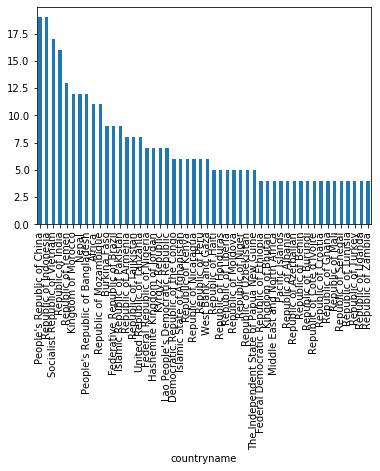

In [17]:
world_bank_project_df.groupby('countryname')['countryname'].count().nlargest(50).plot(kind='bar')

In [18]:
########## 
########## Question 1 [End]
##########

# Question 2

In [19]:
########## 
########## Question 2 [Start]
########## Find the top 10 major project themes (using column 'mjtheme_namecode')
##########

In [20]:
### Load the JSON string from the local file
data_json = json.load((open('data/world_bank_projects.json')))

In [21]:
### JSON normalize is used here because of the nested dataframe. the result is assigned to a new dataframe
theme_df = json_normalize(data_json, 'mjtheme_namecode')
theme_df

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [22]:
# Set the dataframe column datatypes for more efficient and correct processing
# code as int, name as category
theme_df['code'] = theme_df['code'].astype('int64')
theme_df['name'] = theme_df['name'].astype('category')


In [23]:
# must find where name == [blank] and back fill the code 
# i.e. create a dimensional table / data dictionary of all the unique codes
# then use that to back fill the blank names

# theme_df[theme_df['name'] == '']
theme_df['name'].unique()

[Human development, , Economic management, Social protection and risk management, Trade and integration, ..., Social dev/gender/inclusion, Financial and private sector development, Rural development, Urban development, Rule of law]
Length: 12
Categories (12, object): [Human development, , Economic management, Social protection and risk management, ..., Financial and private sector development, Rural development, Urban development, Rule of law]

In [24]:
# spot check of the distinct codes
theme_df['code'].unique()

array([ 8, 11,  1,  6,  5,  2,  7,  4, 10,  9,  3], dtype=int64)

In [25]:
# spot check of blank codes (none are found)
dim_theme_temp = theme_df[theme_df['name']!='']
dim_theme_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1498
Data columns (total 2 columns):
code    1377 non-null int64
name    1377 non-null category
dtypes: category(1), int64(1)
memory usage: 23.3 KB


In [26]:
# finally, create a new dataframe that has the unique codes along with their respective names.
grouped = dim_theme_temp.groupby(['code', 'name']).size().reset_index().rename(columns={0:'count'})
grouped = grouped.drop(columns=['count'])
grouped = grouped.set_index('code')
grouped

,name
code,
1,Economic management
2,Public sector governance
3,Rule of law
4,Financial and private sector development
5,Trade and integration
6,Social protection and risk management
7,Social dev/gender/inclusion
8,Human development
9,Urban development


In [27]:
# dim_theme['concat_code_name'] = dim_theme['code'].astype(str) + '_' + dim_theme['name'].astype(str)
theme_dict = grouped.T.to_dict('list')

# use dict comprehension to convert the dict values from single item list to a string
theme_dict = {key: str(val[0]) for key, val in theme_dict.items()}
theme_dict

{1: 'Economic management',
 2: 'Public sector governance',
 3: 'Rule of law',
 4: 'Financial and private sector development',
 5: 'Trade and integration',
 6: 'Social protection and risk management',
 7: 'Social dev/gender/inclusion',
 8: 'Human development',
 9: 'Urban development',
 10: 'Rural development',
 11: 'Environment and natural resources management'}

In [28]:
#practice getting the theme name via the theme code
type(theme_dict[1])
# this code is applicable when the value in the dict was a list

str

In [29]:
#custom function to get the theme name from the code.
#maybe add some error handling in case the number is not found??
# do we need this??
def get_theme_name(row):    
    return theme_dict[row['code']][0]

In [30]:
#should we temp back fill in each row to "mark" for future reference that we "touched" the value?
#theme_df['name_clean'] = theme_df.apply(get_theme_name, axis=1)
theme_df['name_clean'] = (theme_df['code'].map(theme_dict))
theme_df

,code,name,name_clean
0,8,Human development,Human development
1,11,,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration
...,...,...,...
1494,10,Rural development,Rural development
1495,9,Urban development,Urban development
1496,8,Human development,Human development
1497,5,Trade and integration,Trade and integration


In [31]:
# Therefore after cleaning and filling in the blank names, the 10 most common themes are the following:

theme_df['name_clean'].value_counts(dropna=False).nlargest(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_clean, dtype: int64

In [32]:
### ================================================================================================
### make a histogram/bar here if you have time later

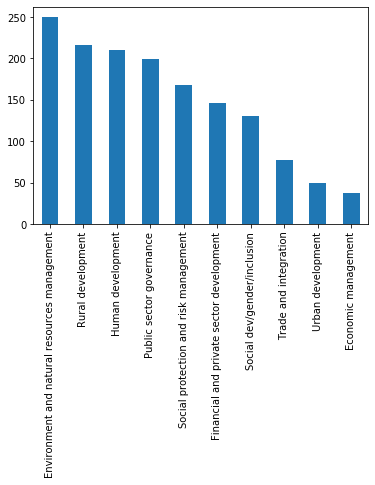

In [33]:
theme_df['name_clean'].value_counts(dropna=False).nlargest(10).plot(kind='bar')

In [34]:
########## 
########## Question 2 [End]
##########

# Question 3

In [35]:
##########
########## Question 3 [Start]
##########
########## In 2. above you will notice that some entries have only the code and the name is missing. 
########## Create a dataframe with the missing names filled in.

In [36]:
# Bring in the JSON string into a DataFrame.
# we will use the $oid from the original datasource as our lookup key

theme_df_q3 = json_normalize(data_json, 'mjtheme_namecode',['_id', ['_id', '$oid']], errors='ignore')
theme_df_q3

,code,name,_id,_id.$oid
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780
1,11,,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780
2,1,Economic management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781
3,6,Social protection and risk management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781
4,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c782'},52b213b38594d8a2be17c782
...,...,...,...,...
1494,10,Rural development,{'$oid': '52b213b38594d8a2be17c972'},52b213b38594d8a2be17c972
1495,9,Urban development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973
1496,8,Human development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973
1497,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973


In [37]:
# get the clean names by creating a lookup  against the name codes 
# store the results against hte original $oid so they can ultimately be merged back to the full dataframe

theme_df_q3['name_clean'] = (theme_df['code'].map(theme_dict))
theme_df_q3

,code,name,_id,_id.$oid,name_clean
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780,Human development
1,11,,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780,Environment and natural resources management
2,1,Economic management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781,Economic management
3,6,Social protection and risk management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781,Social protection and risk management
4,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c782'},52b213b38594d8a2be17c782,Trade and integration
...,...,...,...,...,...
1494,10,Rural development,{'$oid': '52b213b38594d8a2be17c972'},52b213b38594d8a2be17c972,Rural development
1495,9,Urban development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Urban development
1496,8,Human development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Human development
1497,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Trade and integration


In [38]:
# do we need to set the index?
#theme_df_q3.set_index('_id.$oid', drop=True, inplace=True)

In [39]:
# replace the (bad) names with the clean names

theme_df_q3['name'] = theme_df_q3['name_clean']
theme_df_q3

,code,name,_id,_id.$oid,name_clean
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780,Human development
1,11,Environment and natural resources management,{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780,Environment and natural resources management
2,1,Economic management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781,Economic management
3,6,Social protection and risk management,{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781,Social protection and risk management
4,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c782'},52b213b38594d8a2be17c782,Trade and integration
...,...,...,...,...,...
1494,10,Rural development,{'$oid': '52b213b38594d8a2be17c972'},52b213b38594d8a2be17c972,Rural development
1495,9,Urban development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Urban development
1496,8,Human development,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Human development
1497,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c973'},52b213b38594d8a2be17c973,Trade and integration


In [40]:
# column cleanup after merging

theme_df_q3 = theme_df_q3.drop(columns=['_id', 'name_clean'])
theme_df_q3

,code,name,_id.$oid
0,8,Human development,52b213b38594d8a2be17c780
1,11,Environment and natural resources management,52b213b38594d8a2be17c780
2,1,Economic management,52b213b38594d8a2be17c781
3,6,Social protection and risk management,52b213b38594d8a2be17c781
4,5,Trade and integration,52b213b38594d8a2be17c782
...,...,...,...
1494,10,Rural development,52b213b38594d8a2be17c972
1495,9,Urban development,52b213b38594d8a2be17c973
1496,8,Human development,52b213b38594d8a2be17c973
1497,5,Trade and integration,52b213b38594d8a2be17c973


In [41]:
#examining the results

world_bank_project_df[['mjtheme_namecode', '_id']].head()

,mjtheme_namecode,_id
0,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c780'}
1,"[{'code': '1', 'name': 'Economic management'},...",{'$oid': '52b213b38594d8a2be17c781'}
2,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c782'}
3,"[{'code': '7', 'name': 'Social dev/gender/incl...",{'$oid': '52b213b38594d8a2be17c783'}
4,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c784'}


In [42]:
# preparing the nested dict

theme_df_q3_final = theme_df_q3.groupby('_id.$oid')[['code','name']].apply(lambda x: x.to_json(orient='records'))
theme_df_q3_final

_id.$oid
52b213b38594d8a2be17c780    [{"code":"8","name":"Human development"},{"cod...
52b213b38594d8a2be17c781    [{"code":"1","name":"Economic management"},{"c...
52b213b38594d8a2be17c782    [{"code":"5","name":"Trade and integration"},{...
52b213b38594d8a2be17c783    [{"code":"7","name":"Social dev\/gender\/inclu...
52b213b38594d8a2be17c784    [{"code":"5","name":"Trade and integration"},{...
                                                  ...                        
52b213b38594d8a2be17c96f    [{"code":"4","name":"Financial and private sec...
52b213b38594d8a2be17c970    [{"code":"8","name":"Human development"},{"cod...
52b213b38594d8a2be17c971    [{"code":"10","name":"Rural development"},{"co...
52b213b38594d8a2be17c972    [{"code":"10","name":"Rural development"},{"co...
52b213b38594d8a2be17c973    [{"code":"9","name":"Urban development"},{"cod...
Length: 500, dtype: object

In [43]:
# setting the ids
world_bank_project_df['_id_clean'] = json_normalize(world_bank_project_df['_id'])
world_bank_project_df

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id,_id_clean
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'},52b213b38594d8a2be17c780
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'},52b213b38594d8a2be17c781
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'},52b213b38594d8a2be17c782
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'},52b213b38594d8a2be17c783
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'},52b213b38594d8a2be17c784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'},52b213b38594d8a2be17c96f
496,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{'$oid': '52b213b38594d8a2be17c970'},52b213b38594d8a2be17c970
497,"[{'Name': 'Irrigation and drainage'}, {'Name':...",N,OTHER,RE,[Rural development],0,MINISTRY OF AGRICULTURE AND PRODUCER ORGANISAT...,Second Emergency Agricultural Productivity Sup...,"10,6",2014-12-31T00:00:00Z,...,August,"[{'code': '91', 'name': 'Global food crisis re...",Republic of Guinea,http://www.worldbank.org/projects/P128309/seco.

In [44]:
#setting the index to prepare for the concat

world_bank_project_df.set_index('_id_clean', inplace=True)
world_bank_project_df

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
_id_clean,,,,,,,,,,,,,,,,,,,,,
52b213b38594d8a2be17c780,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
52b213b38594d8a2be17c781,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
52b213b38594d8a2be17c782,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
52b213b38594d8a2be17c783,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
52b213b38594d8a2be17c784,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52b213b38594d8a2be17c96f,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Agriculture, fishing...",August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'}
52b213b38594d8a2be17c970,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,"[{'Percent': 36, 'Name': 'Public Administratio...",August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{

In [45]:
#concat the final datafframe with the clean names dataframe
world_bank_project_df_final = pd.concat([world_bank_project_df, theme_df_q3_final], axis=1)
world_bank_project_df_final

#this code below doesn't work for some reason??
#world_bank_project_df_final.rename(columns={'Unnamed: 0':'mjtheme_namecode_clean'}, inplace=True)

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id,0
52b213b38594d8a2be17c780,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'},"[{""code"":""8"",""name"":""Human development""},{""cod..."
52b213b38594d8a2be17c781,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'},"[{""code"":""1"",""name"":""Economic management""},{""c..."
52b213b38594d8a2be17c782,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'},"[{""code"":""5"",""name"":""Trade and integration""},{..."
52b213b38594d8a2be17c783,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'},"[{""code"":""7"",""name"":""Social dev\/gender\/inclu..."
52b213b38594d8a2be17c784,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'},"[{""code"":""5"",""name"":""Trade and integration""},{..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52b213b38594d8a2be17c96f,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'},"[{""code"":""4"",""name"":""Financial and private sec..."
52b213b38594d8a2be17c970,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{'$oid': '52b213b38594d8a2be17c970'},"[{""code"":

In [46]:
#examining results
world_bank_project_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 52b213b38594d8a2be17c780 to 52b213b38594d8a2be17c973
Data columns (total 51 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null o

In [47]:
#examining results
world_bank_project_df_final.columns

Index([                  'sector',     'supplementprojectflg',
           'projectfinancialtype',                 'prodline',
                        'mjtheme',               'idacommamt',
                      'impagency',             'project_name',
                    'mjthemecode',              'closingdate',
                   'totalcommamt',                       'id',
              'mjsector_namecode',                    'docty',
                        'sector1',             'lendinginstr',
                    'countrycode',                  'sector2',
                       'totalamt',         'mjtheme_namecode',
              'boardapprovaldate',         'countryshortname',
                        'sector4',             'prodlinetext',
                'productlinetype',               'regionname',
                         'status',         'country_namecode',
       'envassesmentcategorycode',         'project_abstract',
                     'approvalfy',              'projec

In [48]:
# note to self: renamed column didn't work initially bc of int vs string on the 0

# renaming the "clean" theme_namecode column

world_bank_project_df_final.rename(columns={int(0):'mjtheme_namecode_clean'}, inplace=True)
world_bank_project_df_final

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id,mjtheme_namecode_clean
52b213b38594d8a2be17c780,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'},"[{""code"":""8"",""name"":""Human development""},{""cod..."
52b213b38594d8a2be17c781,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'},"[{""code"":""1"",""name"":""Economic management""},{""c..."
52b213b38594d8a2be17c782,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'},"[{""code"":""5"",""name"":""Trade and integration""},{..."
52b213b38594d8a2be17c783,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'},"[{""code"":""7"",""name"":""Social dev\/gender\/inclu..."
52b213b38594d8a2be17c784,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'},"[{""code"":""5"",""name"":""Trade and integration""},{..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52b213b38594d8a2be17c96f,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'},"[{""code"":""4"",""name"":""Financial and private sec..."
52b213b38594d8a2be17c970,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{'$oid': '52b213b38594d8a2be

In [49]:
# create plots if time allows.